**Importing dependencies and libraries**

Aim: To predict if a person is eligible for a loan or not, using the various features in the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

**EDA**

Loan Status Dataset: https://www.kaggle.com/ninzaami/loan-predication

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('trainloan_generated.csv')

In [3]:
loan_dataset.head() # printing the first 5 rows of the dataframe

,S No,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,Male,No,0,Not Graduate,No,492000,100000,700000,3,1,Rural,N
1,2,Male,Yes,0,Graduate,No,309000,300000,900000,9,1,Urban,Y
2,3,Male,No,3,Not Graduate,No,757000,400000,1000000,5,1,Rural,Y
3,4,Male,Yes,0,Not Graduate,No,372000,300000,1000000,8,1,Urban,Y
4,5,Female,No,0,Not Graduate,No,687000,200000,700000,7,1,Urban,Y


In [4]:
loan_dataset.shape # number of rows and columns

(2000, 13)

In [5]:
loan_dataset.describe() # statistical measures

,S No,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,1.515000,624174.000000,258500.000000,543350.000000,6.078500,0.908500
std,577.494589,1.107876,215546.437821,150196.636163,284317.068777,2.583346,0.288391
min,1.000000,0.000000,250000.000000,0.000000,100000.000000,2.000000,0.000000
25%,500.750000,1.000000,437000.000000,100000.000000,300000.000000,4.000000,1.000000
50%,1000.500000,2.000000,632500.000000,300000.000000,500000.000000,6.000000,1.000000
75%,1500.250000,2.000000,803000.000000,400000.000000,800000.000000,8.000000,1.000000
max,2000.000000,3.000000,1000000.000000,500000.000000,1000000.000000,10.000000,1.000000


In [6]:
loan_dataset.isnull().sum() # number of missing values in each column

S No                  0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_dataset = loan_dataset.dropna() # dropping the missing values

In [8]:
loan_dataset.isnull().sum() # number of missing values in each column

S No                  0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True) # label encoding

In [10]:
loan_dataset.head() # printing the first 5 rows of the dataframe

,S No,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,Male,No,0,Not Graduate,No,492000,100000,700000,3,1,Rural,0
1,2,Male,Yes,0,Graduate,No,309000,300000,900000,9,1,Urban,1
2,3,Male,No,3,Not Graduate,No,757000,400000,1000000,5,1,Rural,1
3,4,Male,Yes,0,Not Graduate,No,372000,300000,1000000,8,1,Urban,1
4,5,Female,No,0,Not Graduate,No,687000,200000,700000,7,1,Urban,1


In [11]:
loan_dataset['Dependents'].value_counts() # Dependent column values

Dependents
2    528
1    495
3    493
0    484
Name: count, dtype: int64

In [12]:
loan_dataset = loan_dataset.replace(to_replace='3+', value=3) # replacing the value of 3+ to 3

In [13]:
# dependent values
loan_dataset['Dependents'].value_counts()

Dependents
2    528
1    495
3    493
0    484
Name: count, dtype: int64

c:\Users\arige\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arige\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arige\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arige\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

AttributeError: 'numpy.int64' object has no attribute 'startswith'

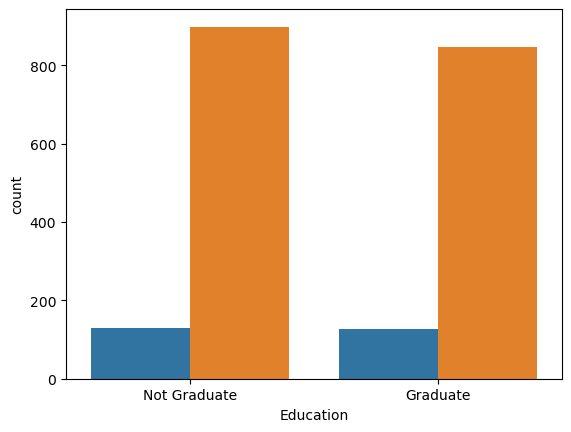

In [15]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

c:\Users\arige\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arige\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arige\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arige\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

AttributeError: 'numpy.int64' object has no attribute 'startswith'

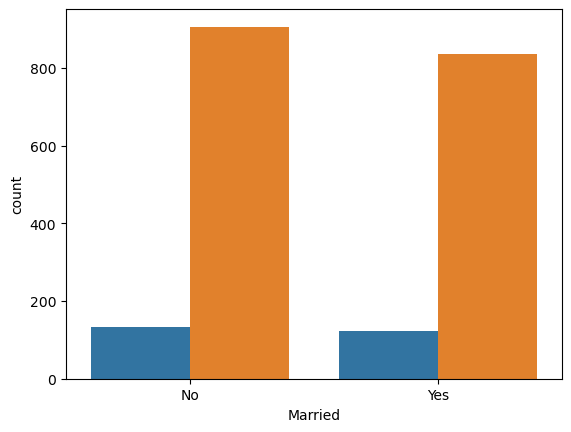

In [16]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [32]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Semi-Rural':1,'#VALUE!':0,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [33]:
loan_dataset.head()

,S No,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,0,0,492000,100000,700000,3,1,0,0
1,2,1,1,0,1,0,309000,300000,900000,9,1,2,1
2,3,1,0,3,0,0,757000,400000,1000000,5,1,0,1
3,4,1,1,0,0,0,372000,300000,1000000,8,1,2,1
4,5,0,0,0,0,0,687000,200000,700000,7,1,2,1


In [34]:
# separating the data and label
X = loan_dataset.drop(columns=['S No','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [35]:
print(X)
print(Y)

      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome   \
0          1        0           0          0              0            492000   
1          1        1           0          1              0            309000   
2          1        0           3          0              0            757000   
3          1        1           0          0              0            372000   
4          0        0           0          0              0            687000   
...      ...      ...         ...        ...            ...               ...   
1995       1        0           3          1              0            269000   
1996       1        1           3          0              0            606000   
1997       1        0           1          1              0            692000   
1998       0        0           2          1              0            595000   
1999       1        1           3          1              1            689000   

      CoapplicantIncome   L

Train Test Split

In [36]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 11) (1600, 11) (400, 11)


**Training the model:**

Support Vector Machine Model

In [38]:
classifier = svm.SVC(kernel='linear')

In [39]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

**Model Evaluation**

In [40]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [41]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.879375


In [42]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [43]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.88


**Making a predictive system**

In [46]:
input_data = (1,1,0,1,1,300000,0.0,400000,4,1.0,2)

input_data_as_numpy_array = np.asarray(input_data) # changing the input_data to numpy array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) # reshape the array 

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not eligible for loan')
else:
  print('\nThe person is eligible for loan')

[1]

The person is eligible for loan


c:\Users\arige\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## Importing the model into a joblib package


In [47]:
import joblib

In [48]:
# Save the model to disk
joblib.dump(classifier, 'model1.pkl')

['model1.pkl']